In [1]:
from tensorflow import keras

# 딥러닝

손글씨 숫자를 학습시켜보자

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_input.shape

(60000, 28, 28)

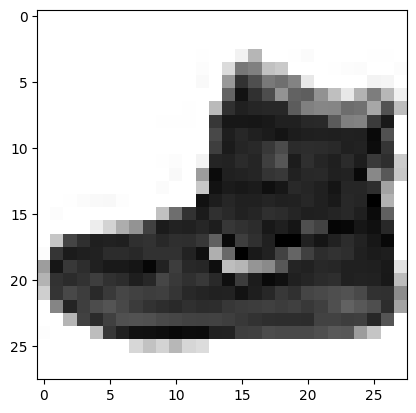

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_input[0], cmap='gray_r')

In [16]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) # 사진 데이터를 일렬로 펴는 작업

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(scores)

{'fit_time': array([11.38300347, 11.56519914, 10.83407593, 10.97144938,  7.27546573]), 'score_time': array([0.04430842, 0.05913711, 0.04782128, 0.05387354, 0.02919054]), 'test_score': array([0.82583333, 0.78425   , 0.75825   , 0.76333333, 0.83666667])}


In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [23]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))# 밀집층 만들건데 케라스 안에 레이어 안에 덴스라고 구현되어있다.
# 덴스(몇개의 분류할건지, 액티베이션(활성화함수)=다중분류(소프트맥스), 인풋쉐입(내가 가지고있는 크기)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model = keras.Sequential([dense]) # 버전업되면서 리스트로 넣어줘야 하는걸로 정해졌다
# 덴스층 딱 하나만 잇는 모델을 만든것

In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 손실함수 정의하는 공간이며 우리가 정해줘야 한다. 경사하강법 할때는 라이브러리가 알아서 해줫음
# accuracy : 정확도가 높은 방향으로 학습해줘

In [33]:
# 학습시켜보자
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7284 - loss: 0.8013
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8374 - loss: 0.4780
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8421 - loss: 0.4602
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8468 - loss: 0.4463
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8516 - loss: 0.4346


In [34]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8557 - loss: 0.4221


[0.42996594309806824, 0.8530666828155518]